In [1]:
import pandas as pd
from matplotlib import pyplot as plt

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).

This dataset is huge (about 55 MB) and migth take so long to upload it to the server. Instead, we will directly download it from the url link as below.

In [2]:
url = "https://github.com/jvns/pandas-cookbook/raw/v0.2/data/311-service-requests.csv"
complaints = pd.read_csv(url)

/var/folders/fn/2l89qd8n053f84k8b5q1wknm0000gn/T/ipykernel_69379/2818304605.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv(url)


Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.

# What's even in it? (the summary)

In [3]:
# this is the way how you can check pandas version
print(pd.__version__)

2.2.2


In [ ]:
complaints.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372.0,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419.0,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417.0,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011.0,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225.0,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"


In [ ]:
complaints.shape

(111069, 52)

# Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [4]:
# print complaint type series (only first 5 rows) with head()


0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

We can combine these to get the first 5 rows of a column:

In [5]:
# print complaint type series (only first 5 rows) with [] notation


0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [6]:
# change the order of the row/column (direction), it will still work


0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

Next week, we will learn loc and iloc functions. So next week repeat this step with both of these functions as well.

# Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [7]:
# select multiple columns (Complaint Type,	Borough)
# you could also do this with loc/iloc (check it again next week)


,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


# What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [8]:
#display the most common 5 complaint type using value_counts() method


Complaint Type
HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
Name: count, dtype: int64

In [9]:
# or using groupby


Complaint Type
HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
dtype: int64

If we just wanted the top 10 most common complaints, we can do this:

Complaint Type
HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: count, dtype: int64

But it gets better! We can plot them!

<Axes: xlabel='Complaint Type'>

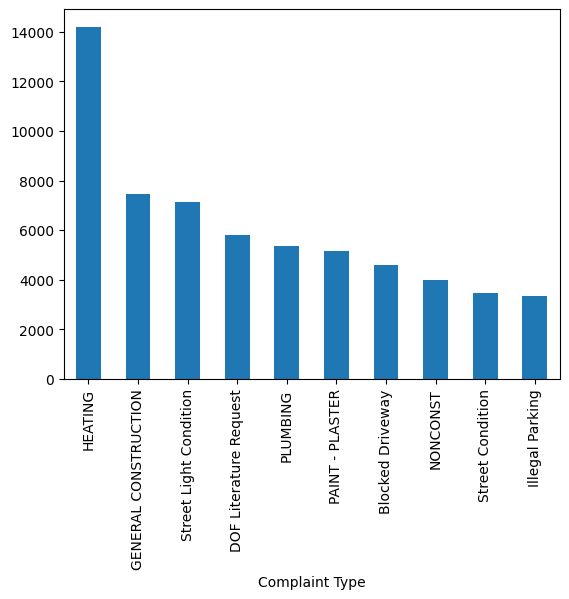